In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate
#df=pd.read_excel('restaurants.xlsx')

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [3]:
#df = pd.read_excel('restaurant_info_6Districts_Ju.xlsx')
df = pd.read_excel('FinalProject/REST_Analysis_JAPANESE.xlsx')

In [4]:
pd.set_option('display.max_columns',40,'display.max_rows',40)

In [5]:
#fit notebook cell to browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<h1>DATA CLEAN

In [6]:
#remove titles
offender_index = df[df['happy']=="happy"].index
df= df.drop(offender_index)

#remove asia miles
asia_miles_index = df[df['food_type'].str.contains("eligible transactions")].index
df= df.drop(asia_miles_index)
df = df.reset_index()
df = df.drop('index',axis=1)

In [7]:
#drop duplicate entries with same name and location
df.drop_duplicates(subset=['name', 'location'], keep='last',inplace = True)

In [8]:
#change columns to float type
df['happy'] = df['happy'].astype(float)
df['sad'] = df['sad'].astype(float)
df['bookmark'] = df['bookmark'].astype(float)

In [9]:
def district(x):
    if x == "Causeway Bay" or x == "Central":
        return "HK"
    if x == "Yuen Long" or x == "Tsuen Wan":
        return "NT"
    else:
        return "KL"
    
df['location'] = df['location'].apply(lambda x: district(x))

In [10]:
#enable sort by price
df['price'] = pd.Categorical(df['price'], ['Below $50','$51-100', '$101-200', '$201-400', '$401-800', 'Above $801'])

In [11]:
#insert additional column of pure numeric prices
df['price_int'] = df['price'].replace({"Below $50":25,"$51-100":75,"$101-200":150,"$201-400":300,"$401-800":600,"Above $801":1000})


In [12]:
#define which food type to search
restaurant_type = ['Japanese','Western','Hong Kong Style','Guangdong','International','Taiwan','Korean','Thai','Italian','Sichuan']
restaurant_type_regex = "Japanese|Western|Hong Kong Style|Guangdong|International|Taiwan|Korean|Thai|Italian|Sichuan"

In [13]:
#define locations
Places = ['Causeway Bay','Central',"Yuen Long","Tsuen Wan","Tsim Sha Tsui","Mong Kok"]

In [14]:
#filter out restaurants who are in the majority
df = df[df['food_type'].str.contains(restaurant_type_regex)]
df.reset_index(inplace = True)
df = df.drop('index',axis=1)

In [15]:
#give food type a number
food_model = OrdinalEncoder()
test = pd.DataFrame(food_model.fit_transform(df[['food_type']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"food_int"})
df.shape

(1186, 19)

In [16]:
#give location type a number
location_model = OrdinalEncoder()
test = pd.DataFrame(location_model.fit_transform(df[['location']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"location_int"})
df.shape

(1186, 20)

In [17]:
#introduce happy vs sad column
df['happy_vs_sad'] = df['happy']/df['sad']
df['happy_vs_sad'] = np.where(df['happy_vs_sad'] == np.inf, df['happy'], df['happy_vs_sad'])


In [18]:
#df only has Japanese food left
df = df[df['food_type']=="Japanese"]
df

,name,price,bookmark,happy,sad,food_type,location,num_branch,num_seat,pay_list,other_facility,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad
23,Nagasakayaki 長阪燒,$201-400,21046.0,448.0,7.0,Japanese,KL,1.0,70.0,"Visa,Master,AlipayHK,Alipay,Cash,AE","Online Reservation,Wi-Fi,Alcoholic Drinks,May ...",4.0,4.0,4.0,4.0,4.0,20.0,300,4.0,1.0,64.000000
24,Poach 蟲二,$101-200,28896.0,310.0,34.0,Japanese,KL,1.0,0.0,"Cash,PayMe","Wi-Fi,Alcoholic Drinks,Phone Reservation,10% S...",3.0,4.0,3.0,4.0,3.0,17.0,150,4.0,1.0,9.117647
25,Japanese Delight 日本野,$101-200,15226.0,453.0,19.0,Japanese,KL,2.0,50.0,"Visa,Master,Cash,UnionPay,OpenRice Pay","Online Reservation,Wi-Fi,Alcoholic Drinks,May ...",4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,1.0,23.842105
26,Shinko 申子居酒屋,$201-400,30325.0,481.0,11.0,Japanese,KL,2.0,0.0,"Visa,Master,AlipayHK,Alipay,Cash,AE,UnionPay,J...","Online Reservation,Open Till Late,Wi-Fi,Alcoho...",4.0,4.0,4.0,4.0,3.0,19.0,300,4.0,1.0,43.727273
40,Big Bang Don 爆丼屋,$101-200,31504.0,394.0,111.0,Japanese,KL,2.0,0.0,"Visa,Master,Cash,UnionPay,BOC pay",10% Service Charge,3.0,3.0,3.0,3.0,3.0,15.0,150,4.0,1.0,3.549550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Magic Touch (大鴻輝(荃灣)中心),$101-200,2174.0,23.0,2.0,Japanese,NT,3.0,0.0,"Visa,Master,Cash,Octopus",Restaurant Mode of Operation - Type B,3.0,4.0,3.0,4.0,3.0,17.0,150,4.0,2.0,11.500000
1178,Sushi Raku 鮨樂,$101-200,1732.0,18.0,3.0,Japanese,NT,3.0,40.0,"Visa,Master,AlipayHK,Alipay,Cash,JCB","Wi-Fi,Alcoholic Drinks,May Bring Your Own Wine...",3.0,4.0,4.0,4.0,3.0,18.0,150,4.0,2.0,6.000000
1183,Gyujin Shabu Shabu & Sukiyaki Restaurant (City...,$101-200,1543.0,64.0,2.0,Japanese,NT,7.0,0.0,"AlipayHK,Alipay,Cash","May Bring Your Own Wine,Cake-cutting,10% Servi...",4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,2.0,32.000000
1184,侍元,$51-100,384.0,27.0,5.0,Japanese,NT,1.0,0.0,"Visa,AlipayHK,Alipay,Cash,Octopus,OpenRice Pay",Spot payment,3.0,4.0,3.0,4.0,4.0,18.0,75,4.0,2.0,5.400000


In [19]:
df['num_payment'] = df['pay_list'].str.count(',')+1
df['num_facility'] = df['other_facility'].str.count(',')+1

In [20]:
df_c=df

In [21]:
df_c

,name,price,bookmark,happy,sad,food_type,location,num_branch,num_seat,pay_list,other_facility,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility
23,Nagasakayaki 長阪燒,$201-400,21046.0,448.0,7.0,Japanese,KL,1.0,70.0,"Visa,Master,AlipayHK,Alipay,Cash,AE","Online Reservation,Wi-Fi,Alcoholic Drinks,May ...",4.0,4.0,4.0,4.0,4.0,20.0,300,4.0,1.0,64.000000,6.0,11.0
24,Poach 蟲二,$101-200,28896.0,310.0,34.0,Japanese,KL,1.0,0.0,"Cash,PayMe","Wi-Fi,Alcoholic Drinks,Phone Reservation,10% S...",3.0,4.0,3.0,4.0,3.0,17.0,150,4.0,1.0,9.117647,2.0,5.0
25,Japanese Delight 日本野,$101-200,15226.0,453.0,19.0,Japanese,KL,2.0,50.0,"Visa,Master,Cash,UnionPay,OpenRice Pay","Online Reservation,Wi-Fi,Alcoholic Drinks,May ...",4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,1.0,23.842105,5.0,8.0
26,Shinko 申子居酒屋,$201-400,30325.0,481.0,11.0,Japanese,KL,2.0,0.0,"Visa,Master,AlipayHK,Alipay,Cash,AE,UnionPay,J...","Online Reservation,Open Till Late,Wi-Fi,Alcoho...",4.0,4.0,4.0,4.0,3.0,19.0,300,4.0,1.0,43.727273,12.0,12.0
40,Big Bang Don 爆丼屋,$101-200,31504.0,394.0,111.0,Japanese,KL,2.0,0.0,"Visa,Master,Cash,UnionPay,BOC pay",10% Service Charge,3.0,3.0,3.0,3.0,3.0,15.0,150,4.0,1.0,3.549550,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Magic Touch (大鴻輝(荃灣)中心),$101-200,2174.0,23.0,2.0,Japanese,NT,3.0,0.0,"Visa,Master,Cash,Octopus",Restaurant Mode of Operation - Type B,3.0,4.0,3.0,4.0,3.0,17.0,150,4.0,2.0,11.500000,4.0,1.0
1178,Sushi Raku 鮨樂,$101-200,1732.0,18.0,3.0,Japanese,NT,3.0,40.0,"Visa,Master,AlipayHK,Alipay,Cash,JCB","Wi-Fi,Alcoholic Drinks,May Bring Your Own Wine...",3.0,4.0,4.0,4.0,3.0,18.0,150,4.0,2.0,6.000000,6.0,6.0
1183,Gyujin Shabu Shabu & Sukiyaki Restaurant (City...,$101-200,1543.0,64.0,2.0,Japanese,NT,7.0,0.0,"AlipayHK,Alipay,Cash","May Bring Your Own Wine,Cake-cutting,10% Servi...",4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,2.0,32.000000,3.0,4.0
1184,侍元,$51-100,384.0,27.0,5.0,Japanese,NT,1.0,0.0,"Visa,AlipayHK,Alipay,Cash,Octopus,OpenRice Pay",Spot payment,3.0,4.0,3.0,4.0,4.0,18.0,75,4.0,2.0,5.400000,6.0,1.0


In [22]:
df_fac=df_c[['name','bookmark','happy','location','taste','decor','service','hygiene','value','overall','happy_vs_sad','num_facility','other_facility']]
df_fac.fillna(0)
#df_fac['location'] = df_fac['location'].apply(lambda x: district(x))
df_fac=df_fac[df_fac['other_facility']!=0]
df_fac['facilities'] = df_fac['other_facility'].str.split(',')
df_fac.reset_index(inplace=True, drop = True)
one_hot = pd.get_dummies(df_fac['facilities'].apply(pd.Series).stack()).sum(level=0)
df_fac = df_fac.merge(one_hot,how='outer',left_index = True, right_index=True)
df_fac_all=df_fac[df_fac['location']=='HK']
df_fac_all.describe()


,bookmark,happy,taste,decor,service,hygiene,value,overall,happy_vs_sad,num_facility,10% Service Charge,Accessible Environment,Alcoholic Drinks,Cake-cutting,Delivery,Eco-Friendly,Exclusive Online Booking,Kid-friendly,May Bring Your Own Wine,Online Reservation,Open Till Late,Opens 24 Hours,Outdoor Seating,Parking,Phone Reservation,Restaurant Mode of Operation - Type B,Restaurant Mode of Operation - Type C,Reward Dining Points,Sea View,Spot payment,TV Broadcast,VIP Room,Vegetarian,Wi-Fi
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.0,111.000000,111.000000,111.00000,111.000000,111.000000
mean,14415.188034,228.598291,3.863248,3.743590,3.692308,3.863248,3.264957,18.427350,44.033857,5.855856,0.891892,0.009009,0.747748,0.351351,0.396396,0.009009,0.027027,0.0,0.477477,0.495495,0.072072,0.009009,0.063063,0.099099,0.594595,0.036036,0.0,0.315315,0.0,0.576577,0.045045,0.18018,0.009009,0.450450
std,8701.468334,209.282974,0.345063,0.438529,0.463524,0.345063,0.480538,1.521774,54.008707,2.938295,0.311925,0.094916,0.436275,0.479558,0.491367,0.094916,0.162898,0.0,0.501758,0.502247,0.259780,0.094916,0.244179,0.300150,0.493197,0.187225,0.0,0.466749,0.0,0.496342,0.208344,0.38608,0.094916,0.499795
min,2129.000000,24.000000,3.000000,3.000000,3.000000,3.000000,2.000000,14.000000,3.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8977.000000,76.000000,4.000000,3.000000,3.000000,4.000000,3.000000,17.000000,14.200000,4.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
50%,11815.000000,141.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,26.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.00000,0.000000,0.000000
75%,18321.000000,328.000000,4.000000,4.000000,4.000000,4.000000,4.000000,19.000000,50.500000,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,1.000000,0.000000,0.00000,0.000000,1.000000
max,45755.000000,1065.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,348.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000


In [23]:
arr_keep=['name','location']
for i,j in list((df_fac.describe().iloc[1]>0.5).items()):
    if j:
        arr_keep.append(i)
df_fac = df_fac[arr_keep]
df_fac_HK=df_fac[df_fac['location']=='HK']
df_fac_HK.reset_index(inplace=True, drop = True)

In [24]:
df['payment_methods'] = df['pay_list'].str.split(',')
df.reset_index(inplace=True, drop = True)

In [25]:
df.describe()

,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.0,330.000000,330.000000,324.000000,301.000000
mean,12537.460606,222.024242,12.463636,2.424242,33.251515,3.742424,3.663636,3.630303,3.733333,3.345455,18.115152,272.500000,4.0,0.954545,40.830435,5.725309,5.375415
std,11268.156893,198.002301,18.449970,4.168417,57.056580,0.437963,0.479563,0.489702,0.442888,0.507147,1.769055,255.314708,0.0,0.814605,51.660722,2.621979,2.908939
min,384.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,3.000000,2.000000,13.000000,25.000000,4.0,0.000000,1.823529,1.000000,1.000000
25%,4644.250000,76.000000,3.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,17.000000,150.000000,4.0,0.000000,11.653846,4.000000,3.000000
50%,10117.000000,149.500000,6.000000,1.000000,0.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,150.000000,4.0,1.000000,23.780303,6.000000,5.000000
75%,16127.250000,312.250000,14.750000,2.000000,50.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,300.000000,4.0,2.000000,44.272727,7.000000,8.000000
max,86010.000000,1065.000000,123.000000,64.000000,360.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,1000.000000,4.0,2.000000,425.000000,12.000000,14.000000


In [26]:
#categorically split payment methods
one_hot = pd.get_dummies(df['payment_methods'].apply(pd.Series).stack()).sum(level=0)
df = df.merge(one_hot,how='outer',left_index = True, right_index=True)


In [27]:
#ignore all payment methods who are not in more than 50% of restaurants
'''
arr_keep = ['name','price','food_type','location']
for i,j in list((df.describe().iloc[1]>0.5).items()):
    if j:
        arr_keep.append(i)
df = df[arr_keep]
df.reset_index(inplace=True, drop = True)
'''


"\narr_keep = ['name','price','food_type','location']\nfor i,j in list((df.describe().iloc[1]>0.5).items()):\n    if j:\n        arr_keep.append(i)\ndf = df[arr_keep]\ndf.reset_index(inplace=True, drop = True)\n"

In [28]:
df_HK=df[df['location']=='HK']
df.reset_index(inplace=True, drop = True)


In [29]:
df

,name,price,bookmark,happy,sad,food_type,location,num_branch,num_seat,pay_list,other_facility,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,...,Alipay,AlipayHK,Apple Pay,BOC pay,Cash,Diners Discover,EPS,Google Pay,JCB,Master,Octopus,OpenRice Pay,Pay me,PayMe,Payme,Samsung Pay,UnionPay,Visa,WeChat Pay,微信支付 (國內)
0,Nagasakayaki 長阪燒,$201-400,21046.0,448.0,7.0,Japanese,KL,1.0,70.0,"Visa,Master,AlipayHK,Alipay,Cash,AE","Online Reservation,Wi-Fi,Alcoholic Drinks,May ...",4.0,4.0,4.0,4.0,4.0,20.0,300,4.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Poach 蟲二,$101-200,28896.0,310.0,34.0,Japanese,KL,1.0,0.0,"Cash,PayMe","Wi-Fi,Alcoholic Drinks,Phone Reservation,10% S...",3.0,4.0,3.0,4.0,3.0,17.0,150,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Japanese Delight 日本野,$101-200,15226.0,453.0,19.0,Japanese,KL,2.0,50.0,"Visa,Master,Cash,UnionPay,OpenRice Pay","Online Reservation,Wi-Fi,Alcoholic Drinks,May ...",4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Shinko 申子居酒屋,$201-400,30325.0,481.0,11.0,Japanese,KL,2.0,0.0,"Visa,Master,AlipayHK,Alipay,Cash,AE,UnionPay,J...","Online Reservation,Open Till Late,Wi-Fi,Alcoho...",4.0,4.0,4.0,4.0,3.0,19.0,300,4.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Big Bang Don 爆丼屋,$101-200,31504.0,394.0,111.0,Japanese,KL,2.0,0.0,"Visa,Master,Cash,UnionPay,BOC pay",10% Service Charge,3.0,3.0,3.0,3.0,3.0,15.0,150,4.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Magic Touch (大鴻輝(荃灣)中心),$101-200,2174.0,23.0,2.0,Japanese,NT,3.0,0.0,"Visa,Master,Cash,Octopus",Restaurant Mode of Operation - Type B,3.0,4.0,3.0,4.0,3.0,17.0,150,4.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
326,Sushi Raku 鮨樂,$101-200,1732.0,18.0,3.0,Japanese,NT,3.0,40.0,"Visa,Master,AlipayHK,Alipay,Cash,JCB","Wi-Fi,Alcoholic Drinks,May Bring Your Own Wine...",3.0,4.0,4.0,4.0,3.0,18.0,150,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
327,Gyujin Shabu Shabu & Sukiyaki Restaurant (City...,$101-200,1543.0,64.0,2.0,Japanese,NT,7.0,0.0,"AlipayHK,Alipay,Cash","May Bring Your Own Wine,Cake-cutting,10% Servi...",4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
328,侍元,$51-100,384.0,27.0,5.0,Japanese,NT,1.0,0.0,"Visa,AlipayHK,Alipay,Cash,Octopus,OpenRice Pay",Spot payment,3.0,4.0,3.0,4.0,4.0,18.0,75,4.0,2.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h1>USEFUL VISUALIZATION TOOLS

In [30]:
def bar_chart(column,x_axis = "variables",title = "graph of X",y_axis = "number of X"): #draws bar chart, input one array
    x = column.value_counts(sort=False).index
    y = column.value_counts(sort=False)

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(x, y, color ='orange',
            width = 0.4)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

In [31]:
def scatter_graph(x,y,title): #draws a scatter graph, input two arrays
    m, b = np.polyfit(x, y, 1)
    print("y intercept: ", b, "slope: ",m)
    plt.scatter(x, y, alpha=0.7)
    try:
        plt.plot(x, m*x + b)
    except:
        None
        
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    

In [32]:

from scipy.optimize import minimize
def funct(x,p):
    poly=np.polyval(p,x)
    return -1*(poly[0]*x**3+poly[1]*x**2+poly[2]*x+poly[3])
def max_poly_regression(x,p):
    #funct(x,p)
    #fit=minimize(funct(x,p),x0=[0,0],method='BFGS')
    fit=minimize(np.polyval(p,x),x0=[0,0],method='BFGS')
    print(fit.x)

In [33]:
def scatter_graph_2(x,y,title,size ):
    #draws a scatter graph with poly regression, input two arrays
    p2 = np.polyfit(x, y, 3)
    
    plt.scatter(x, y, alpha=0.7)
    
    xp=np.linspace(0,size,200)
    plt.plot(xp, np.polyval(p2,xp))
    #max_poly_regression(p2,xp)
        
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    

In [34]:
def find_average(df): #returns sad, happy, bookmark, price_int
    print("Average sad is: ",df['sad'].mean())
    print("Average happy is: ",df['happy'].mean())
    print("Average bookmark is: ",df['bookmark'].mean())
    print("Average price is: ",df['price_int'].mean())
    print("------------------ \n")
    return df['sad'].mean(),df['happy'].mean(),df['bookmark'].mean(),df['price_int'].mean()

In [35]:
def scatter_matrix(df,columns = ['price','bookmark','happy','sad','happy_vs_sad'], dot_size = 30, fig_size = (20,20)):
    visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', s=dot_size,  figsize=fig_size)

In [36]:
def color_scatter_matrix(df,food_or_loc,  columns = ['location_int','price_int','bookmark','happy','sad'], dot_size = 30, fig_size = (20,20)):
     
    if food_or_loc == 'food':
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['food_int'] , s=dot_size,  figsize=fig_size)
        
    
    else: 
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['location_int'] , s=dot_size,  figsize=fig_size)


In [37]:
def legend(food_loc): #finds legend for color_scatter_matrix

    if food_loc == 'food':
        base_tags = pd.DataFrame(list(range(df['food_int'].nunique())))
        plt.imshow([np.unique(df['food_int'])])
        plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
    else:
        base_tags = pd.DataFrame(list(range(df['location_int'].nunique())))
        plt.imshow([np.unique(df['location_int'])])
        plt.xticks(ticks=np.unique(df['location_int']),labels=location_model.inverse_transform(base_tags))

In [38]:
# jointplot
def density_graph(a,b,df):
    sns.jointplot(a, b, 
              data=df, kind="kde")
    plt.show()
    
def scatter_bar(a,b,df):
    sns.jointplot(a, b, 
              data=df, kind="reg")
    plt.show()

In [39]:
def pair_plot(df,variable):
    sns.pairplot(df, hue=variable, height=1.8)
    
    plt.show()

<h1> Conduct Analysis

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="location")


In [44]:
df_pay_200_all = df.groupby('price',as_index=True).get_group('$201-400')
df_pay_200_all.describe()

,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility,AE,Alipay,AlipayHK,Apple Pay,BOC pay,Cash,Diners Discover,EPS,Google Pay,JCB,Master,Octopus,OpenRice Pay,Pay me,PayMe,Payme,Samsung Pay,UnionPay,Visa,WeChat Pay,微信支付 (國內)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.000000,90.000000,90.000000,88.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.000000,90.0,90.000000,90.000000,90.000000,90.000000
mean,18777.377778,311.922222,15.644444,2.277778,50.400000,3.811111,3.722222,3.711111,3.777778,3.322222,18.344444,300.0,4.0,0.777778,47.326177,6.566667,6.670455,0.433333,0.744444,0.755556,0.200000,0.0,1.0,0.0,0.022222,0.155556,0.144444,0.933333,0.044444,0.088889,0.0,0.0,0.011111,0.0,0.777778,0.933333,0.311111,0.011111
std,14608.478344,244.078511,19.812782,2.808605,79.085191,0.393613,0.450412,0.455785,0.418069,0.469946,1.537261,0.0,0.0,0.699563,65.754297,2.157037,2.651053,0.498312,0.438617,0.432165,0.402241,0.0,0.0,0.0,0.148231,0.364464,0.353509,0.250841,0.207235,0.286178,0.0,0.0,0.105409,0.0,0.418069,0.250841,0.465542,0.105409
min,1338.000000,31.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,15.000000,300.0,4.0,0.000000,3.567797,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,8658.750000,103.500000,4.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,3.000000,17.000000,300.0,4.0,0.000000,14.905172,5.000000,5.000000,0.000000,0.250000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
50%,14988.500000,208.500000,7.000000,1.000000,36.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,300.0,4.0,1.000000,25.066316,7.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
75%,25024.000000,509.000000,20.750000,2.000000,55.500000,4.000000,4.000000,4.000000,4.000000,4.000000,19.000000,300.0,4.0,1.000000,47.651786,8.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,1.000000,0.000000
max,86010.000000,895.000000,118.000000,16.000000,350.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,300.0,4.0,2.000000,425.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
g = sns.boxplot(
    data=df,
    x="num_seat", y="overall", hue="price_int",
  
)

<AxesSubplot:xlabel='location', ylabel='service'>

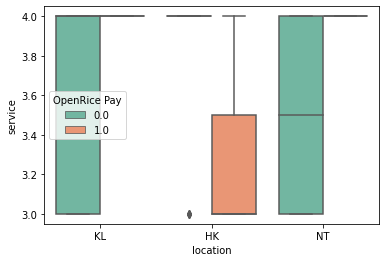

In [46]:
sns.boxplot(x="location", y="service",
            hue="OpenRice Pay", palette='Set2',
            data=df_pay_200_all)

In [ ]:
#for i in ['taste', 'decor', 'service',  'hygiene', 'value','overall']: #num_facility

sns.boxplot(x="location", y="overall",
            hue="Master", palette='Set2',
            data=df)

In [ ]:
sns.boxplot(x="price_int", y="overall",
            hue="Visa", palette='Set2',
            data=df)

service
             num_payment   service
num_payment     1.000000  0.047324
service         0.047324  1.000000


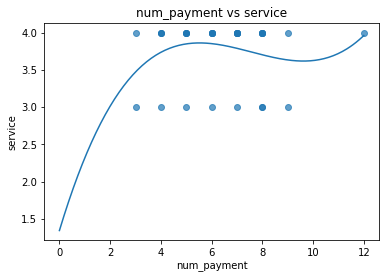

y intercept:  3.696823869104909 slope:  0.01058710298363809


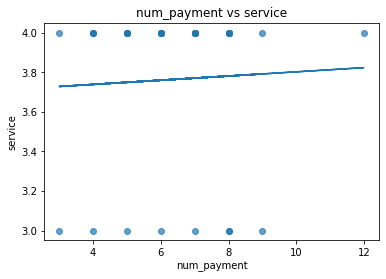

value
             num_payment     value
num_payment     1.000000  0.115076
value           0.115076  1.000000


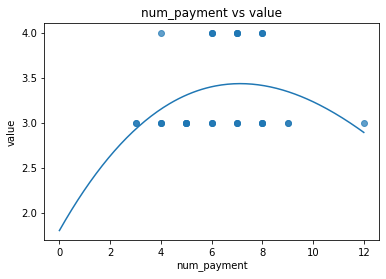

y intercept:  3.1414821944177107 slope:  0.028392685274302117


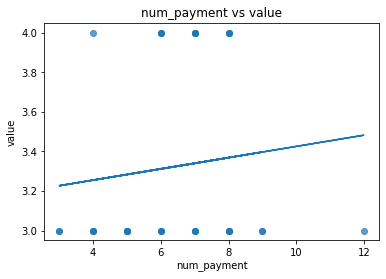

overall
             num_payment   overall
num_payment     1.000000  0.113215
overall         0.113215  1.000000


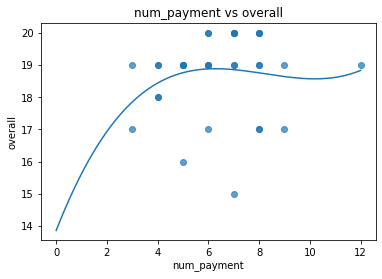

y intercept:  18.227622714148225 slope:  0.07459095283926795


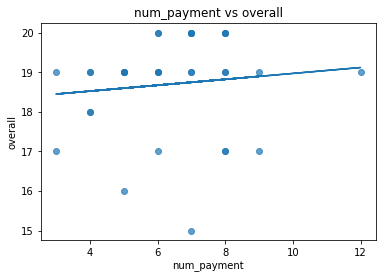

happy
             num_payment    happy
num_payment      1.00000  0.14243
happy            0.14243  1.00000


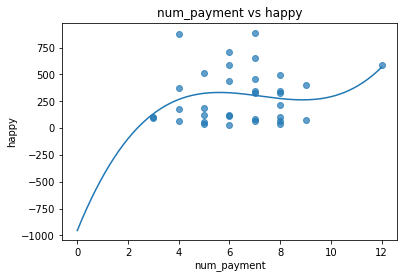

y intercept:  178.49711260827723 slope:  18.509624639076044


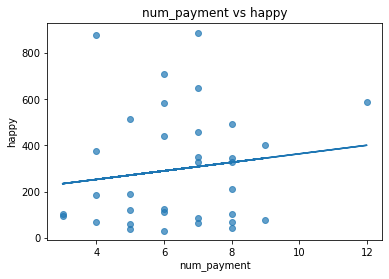

bookmark
             num_payment  bookmark
num_payment     1.000000 -0.104127
bookmark       -0.104127  1.000000


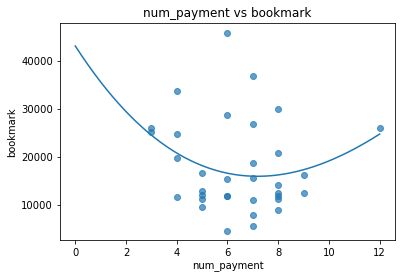

y intercept:  21122.351299326274 slope:  -514.5043310875838


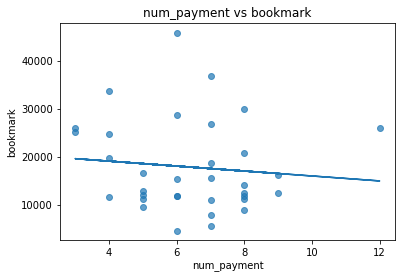

happy_vs_sad
              num_payment  happy_vs_sad
num_payment      1.000000      0.137451
happy_vs_sad     0.137451      1.000000


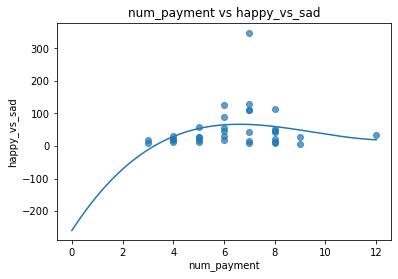

y intercept:  22.34945860756931 slope:  4.560763357293747


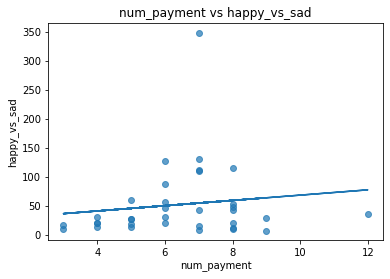

In [56]:
df_pay=df_HK
df_pay_200 = df_pay.groupby('price',as_index=True).get_group('$201-400')
#df_pay_200.dropna(inplace=True)
#df_pay_200.reset_index(inplace=True, drop = True)
for i in ['service'
          ,'value','overall','happy','bookmark','happy_vs_sad']:
    print(i)
    print(df_pay_200[["num_payment",i]].corr())
    title = 'num_payment vs '+i
    scatter_graph_2(df_pay_200['num_payment'], df_pay_200[i], title,12)
    scatter_graph(df_pay_200['num_payment'], df_pay_200[i], title)
    plt.show()

In [ ]:

for i in ['overall']:#,'service','value','happy','bookmark','happy_vs_sad']:
    for j in list(df.columns)[-6:]:
        print(i)
        print(df[[j,i]].corr())
        sns.boxplot(x="price", y=i,
                hue=j, palette='Set2',
                data=df_pay)
        plt.show()

In [51]:
arr_keep = ['name','price','food_type','location']

for i,j in list((df_pay_200.describe().iloc[1]>0.25).items()):
    if j:
        arr_keep.append(i)
df_pay_200 = df_pay_200[arr_keep]
df_pay_200.reset_index(inplace=True, drop = True)


In [52]:
df_pay_200.describe()

,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,happy_vs_sad,num_payment,num_facility,AE,Alipay,AlipayHK,Cash,Master,UnionPay,Visa,WeChat Pay
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.0,34.000000,34.000000,33.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000
mean,17823.470588,297.176471,10.911765,1.529412,46.558824,3.911765,3.794118,3.764706,3.911765,3.323529,18.705882,300.0,4.0,51.592000,6.411765,7.242424,0.441176,0.705882,0.735294,1.0,0.970588,0.764706,0.970588,0.294118
std,9509.739557,250.114334,13.569948,1.481917,54.558943,0.287902,0.410426,0.430562,0.287902,0.474858,1.268008,0.0,0.0,63.860500,1.924604,2.487849,0.503995,0.462497,0.447811,0.0,0.171499,0.430562,0.171499,0.462497
min,4633.000000,31.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,15.000000,300.0,4.0,6.909091,3.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,11629.750000,87.000000,3.000000,1.000000,11.500000,4.000000,4.000000,4.000000,4.000000,3.000000,18.250000,300.0,4.0,17.500000,5.000000,6.000000,0.000000,0.000000,0.250000,1.0,1.000000,1.000000,1.000000,0.000000
50%,14786.500000,201.500000,5.500000,1.000000,40.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,300.0,4.0,29.571429,6.500000,8.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000
75%,24987.000000,452.000000,12.500000,1.000000,50.000000,4.000000,4.000000,4.000000,4.000000,4.000000,19.750000,300.0,4.0,55.687500,8.000000,9.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,45755.000000,888.000000,53.000000,7.000000,280.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,300.0,4.0,348.000000,12.000000,11.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [ ]:


#df_pay_200.dropna(inplace=True); df_pay_200.reset_index(inplace=True, drop = True)
for j in list(df_pay_200.columns)[-8:]:
    print(j,'count')
    grp=df_pay_200.groupby(j,as_index=True)
    print(grp[j].count())
    
    for i in ['service','overall']:#,'value','happy','bookmark','happy_vs_sad']:
        print('\n')
        print(df_pay_200[[j,i]].corr())
        print(grp.agg({i:'mean'}))
        
    print('\n')


In [ ]:

for j in list(df_fac_all.columns)[14:]:
    print(j)
    grp=df_fac_all.groupby(j,as_index=True)
    for i in ['service','value','overall','happy','bookmark','happy_vs_sad']:
        print('\n')
        
        print(grp.agg({i:'median'}))
        
    print('\n')
    


In [ ]:
#df_fac_all.dropna(inplace=True)
for i in ['service','value','overall','happy','bookmark','happy_vs_sad']: #num_facility
    print(i)
    title = 'num_facility vs '+i
    scatter_graph_2(df_fac_all['num_facility'], df_fac_all[i], title,15)
    print(df_fac_all[['num_facility',i]].corr())
    #scatter_bar("num_facility",i,df_fac_HK)


In [ ]:
df_seat=df_HK[df_HK['num_seat'] != 0]
for i in ['overall','taste', 'decor', 'service',  'hygiene', 'value','happy','bookmark']:
    print(i)
    title = 'number of seat vs '+i
    scatter_graph_2(df_seat['num_seat'],df_seat[i], title,280)
    print(df_seat[['num_seat',i]].corr())

In [ ]:
density_graph("num_seat","overall",df)


In [ ]:
for i in Places:
    print(i)
    density_graph("happy","overall",df[df['location']==i])
#df[df['location']=="Central"].sort_values(by='happy', ascending = False)

In [ ]:
for i in df.iloc[:,11:16].columns:
    density_graph(i,"overall",df)

In [ ]:
df

In [ ]:
for i in ['taste', 'decor', 'service',  'hygiene', 'value']:
    print(i)
    m, b = np.polyfit(df['happy'], df[i], 1)
    print("slope: ",m)
    scatter_bar("happy",i,df)

In [ ]:
scatter_bar("AlipayHK",'value',df)

In [ ]:
for i in ['taste', 'decor', 'service',  'hygiene','overall']:
    print(i)
    m, b = np.polyfit(df['overall'], df[i], 1)
    print("slope: ",m)
    scatter_bar("value",i,df)

In [ ]:
for i in ['overall','taste', 'decor', 'service',  'hygiene', 'value']:
    print(i)
    scatter_bar("num_seat",i,df[df['location']=="HK"] )
              

In [ ]:
for i in Places:
    print(i)
    scatter_bar("price_int","value",df[df['location']==i])

In [ ]:
sns.jointplot(
    data=df[df['location']=="Central"],
    x="overall", y="happy", hue="location_int",
    kind="kde"
)

In [ ]:
df.iloc[:,11:17]

In [ ]:
df

In [ ]:
sns.catplot(x="location_int", y="overall", hue="price_int", kind="box", data=df)

In [ ]:
for i in Places:
    print(i)
    pair_plot(df[df['location']==i],"price")


In [ ]:
#df['food_type'].unique()

In [ ]:
#top 200 restaurants ranked by happy
top_200 = df.sort_values('happy',ascending=False).iloc[0:200]
print("For top 200 restaurants: \n ------------------")
find_average(top_200)

In [ ]:
for i in Places:
    print("For {} \n------------------".format(i))
    find_average(df[df['location']==i])

In [ ]:
#Top 100 restaurant based on happy/sad ratio, group by prices
for i in Places:
    bar_chart(df[df['location']==i].sort_values("happy_vs_sad",ascending=False).iloc[0:100]['price'], "Price","{}: Graph of distirbution top 100 restaurants' prices based on ratio of happiness VS sadness".format(i), "Number of restaurants")

In [ ]:
#Group restaurants based on region and prices

for i in Places:
    bar_chart(df[df['location']==i]['price'], "Price","{}: Graph of distirbution of prices of restaurants".format(i), "Number of restaurants")

In [ ]:
#find average price in HK
for i in Places:
    print("Average price of a meal in {}:".format(i),df[df['location']==i]['price_int'].mean())

In [ ]:
#find average price of meal in area
for i in Places:
    lowest = 10000000
    highest = 0
    restaurant_low = "error"
    restaurant_high = "error"
    for k in restaurant_type:
        mean_price = df.loc[(df['food_type']==k) & (df['location']==i)]['price_int'].mean()
        if mean_price < lowest:
            restaurant_low = k
            lowest = mean_price
        if mean_price > highest:
            restaurant_high = k
            highest = mean_price
        print("Average price of a {} meal in {}:".format(k,i),mean_price)
    print("-------------------------")
    print("Cheapest food is: {} meal, costing {}".format(restaurant_low, lowest))
    print("Most expensive food is: {} meal, costing {}".format(restaurant_high, highest))
    print("-------------------------")
    print("")

In [ ]:
#Find relationship of bookmarks VS happy
for i in Places:
    scatter_graph(df.loc[(df['location']==i)]['bookmark'],df.loc[(df['location']==i)]['happy'],"Relationship between bookmark and happy in {}".format(i))

In [ ]:
visual = pd.plotting.scatter_matrix(df[['bookmark','happy','sad','price_int','happy_vs_sad']],c=df['food_int'],marker = 'o', s=5, hist_kwds={'bins':15}, figsize=(10,10))


In [ ]:
#maps color to legend
base_tags = pd.DataFrame({0,1,2,3,4,5,6,7,8,9})
#model.inverse_transform(base_tags)

plt.imshow([np.unique(df['food_int'])])
plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
#_ = plt.xticks(ticks=np.unique(df['food']),labels=model.inverse_transform(base_tags))